# <span style="color:navy"> Numerical Simulation Laboratory
# <span style="color:orange"> Numerical Exercises 12
### Keras - Deep & Convolutional Neural Network image recognition

#### <span style="color:black"> Exercise 12.1 </span>

In this first exercises we were provided a code that performed with a Deep Neural Network (DNN) an imaging recognition of a digit. I changed three different kinds of optimizers (added to the given *sgd*): 
1. Adagrad
2. RMSprop
3. Nadam

The different DNNs had been saved in order not to have to train the networks every time, but the structure is the following: 
 - 400 neurons layer, activation = *relu*
 - 100 neurons layer, activation = *relu*
 - Dropout at 50%
 - 10 neurons layer, activation = *softmax*, this layer is necessary for classification networks

The training and validation datasets are the same for all networks and are imported from MNIST, and the loss function is the *categorical cross entropy* often used for classification problems.

In the following cells are the importation of datasets and function to design and compile the DNN, after them rhe results are presented.

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

/home/matteo/.conda/envs/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
an example of a data point with label 4


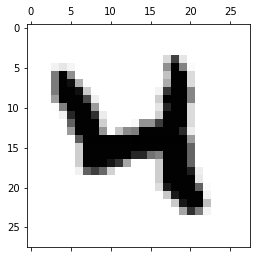

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()  #divide data in train and test automatically

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes) #makes the number become a vector of all zeros but the position of number (which is one)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [3]:
#the following cells are commented since all models have already been trained
#I just load the models and evaluate them 
#if one may wants to create/retrain a model just uncomment
#designed here there's the best one I found in the attempts
"""
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
#model for a Deep Neural Netwirk (standard)
#not convolutional
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5)) #sometimes off 50% of neurons (avoid overfitting)
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')
"""

"\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout\n\ndef create_DNN():\n#model for a Deep Neural Netwirk (standard)\n#not convolutional\n    # instantiate model\n    model = Sequential()\n    # add a dense all-to-all relu layer\n    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))\n    # add a dense all-to-all relu layer\n    model.add(Dense(100, activation='relu'))\n    # apply dropout with rate 0.5\n    model.add(Dropout(0.5)) #sometimes off 50% of neurons (avoid overfitting)\n    # soft-max layer\n    model.add(Dense(num_classes, activation='softmax'))\n    \n    return model\n\nprint('Model architecture created successfully!')\n"

In [4]:
"""
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    #use cross_entropy because I need to have or 1 or 0 (right or fail)
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')
"""

"\nfrom keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam\n\ndef compile_model():\n    # create the model\n    model=create_DNN()\n    # compile the model\n    #use cross_entropy because I need to have or 1 or 0 (right or fail)\n    model.compile(loss=keras.losses.categorical_crossentropy,\n                  optimizer=Adagrad(),\n                  metrics=['accuracy'])\n    return model\n\nprint('Model compiled successfully and ready to be trained.')\n"

In [5]:
"""
# training parameters
batch_size = 32
epochs = 5
#one epoch is to divide training data in group of batch_size, the epoch does not end if all data have not been used yet

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, #ask to write what's happening
          validation_data=(X_test, Y_test))
"""

"\n# training parameters\nbatch_size = 32\nepochs = 5\n#one epoch is to divide training data in group of batch_size, the epoch does not end if all data have not been used yet\n\n# create the deep neural net\nmodel_DNN = compile_model()\n\n# train DNN and store training info in history\nhistory = model_DNN.fit(X_train, Y_train,\n          batch_size=batch_size,\n          epochs=epochs,\n          verbose=1, #ask to write what's happening\n          validation_data=(X_test, Y_test))\n"

In [6]:
"""
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
"""


# look into training history
#if not training any network there won't be any history
#uncomment only if re-training a network or training a new network
"""
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
"""

"\n# summarize history for accuracy\nplt.plot(history.history['acc'])\nplt.plot(history.history['val_acc'])\nplt.ylabel('model accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='best')\nplt.show()\n\n# summarize history for loss\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.ylabel('model loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='best')\nplt.show()\n"

###### Results
Following are the prediction for the 4 different optimizers on 10 different handwritten digits, as the test accuracy says *Adagrad, Nadam* and *RMSprop* are approximately equivalent, with a slight advantage for *Adagrad*. On the test digits *Adagrad* and *RMSprop* are are able to predict all right numbers, while the other two make both one mistake. 


SDG
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
10000/10000 [==============================] - 1s 127us/sample - loss: 0.1586 - acc: 0.9537
Performance on validation data
Test loss: 0.1586065290339291
Test accuracy: 0.9537

60000/60000 [==============================] - 4s 73us/sample - loss: 0.1579 - acc: 0.9528
Performance on training data
Test loss: 0.15791640853782496
Test accuracy: 0.95283335



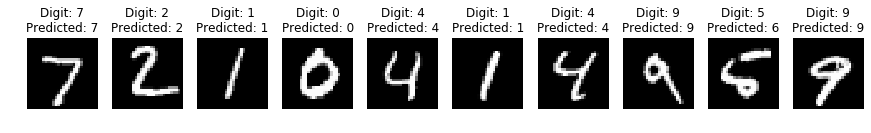

Adagrad
10000/10000 [==============================] - 1s 107us/sample - loss: 0.0729 - acc: 0.9775
Performance on validation data
Test loss: 0.07287969364253805
Test accuracy: 0.9775

60000/60000 [==============================] - 4s 71us/sample - loss: 0.0492 - acc: 0.9857
Performance on training data
Test loss: 0.049209839065140114
Test accuracy: 0.98571664



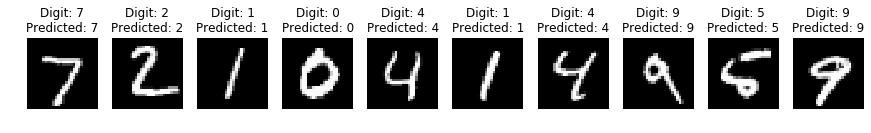

RMSprop
10000/10000 [==============================] - 1s 85us/sample - loss: 0.1505 - acc: 0.9751
Performance on validation data
Test loss: 0.15046292987385304
Test accuracy: 0.9751

60000/60000 [==============================] - 5s 77us/sample - loss: 0.0776 - acc: 0.9853
Performance on training data
Test loss: 0.07757968766050305
Test accuracy: 0.9853333



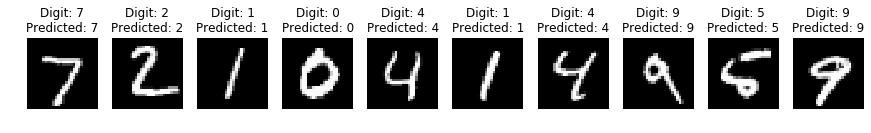

Nadam
10000/10000 [==============================] - 1s 92us/sample - loss: 0.1010 - acc: 0.9765
Performance on validation data
Test loss: 0.10097104007717916
Test accuracy: 0.9765

60000/60000 [==============================] - 4s 73us/sample - loss: 0.0425 - acc: 0.9880
Performance on training data
Test loss: 0.04252628523610862
Test accuracy: 0.98796666



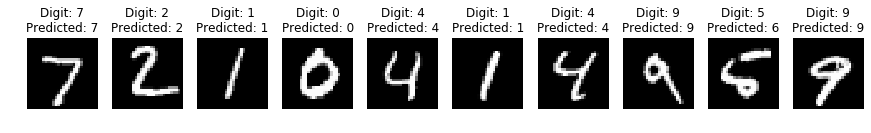

In [7]:
from tensorflow.keras.models import load_model

######################
print("SDG")
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

model_DNN = load_model("Saved/DNN_SGD.mod")
predictions = model_DNN.predict(X_test)

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_DNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()


X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

fig = plt.figure(figsize=(15, 15))
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
########################


print("Adagrad")
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

model_DNN = load_model("Saved/DNN_Adagrad.mod")
predictions = model_DNN.predict(X_test)

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_DNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))
for i in range(10):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
#########################

print("RMSprop")
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

model_DNN = load_model("Saved/DNN_RMSprop.mod")
predictions = model_DNN.predict(X_test)

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_DNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################

print("Nadam")
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

model_DNN = load_model("Saved/DNN_Nadam.mod")
predictions = model_DNN.predict(X_test)

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_DNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


fig = plt.figure(figsize=(15, 15))
for i in range(10): 
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

##### <span style="color:black"> Exercise 12.2 </span>

The second task of the exercises was to design and train a Convolutional Neural Network (CNN) in order to recognize handwritten digits. This second class of architectures should be speeder and more accurate in this kind of problems for it uses translational symmetry of the problem.  
We were given a code to complete that realized a simple CNN and I increased the complexity to have higher accuracy.  
I did several attempts, that are for the most saved in the directory *Saved*, but couldn't realize a better result than the one obtained with the DNN.  

In [15]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

print('X_train shape:', X_test.shape)
print('Y_train shape:', Y_test.shape)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples
X_train shape: (10000, 28, 28, 1)
Y_train shape: (10000, 10)


In [9]:
#As done before the following cells have the code to compilw a CNN
#They are commented since all needed models have been saved and loaded
#in this cell is already designed wha I found to be the best CNN I've been able to produce
"""
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5)) #sometimes off 50% of neurons (avoid overfitting)
    model.add(Conv2D(200, kernel_size = (2,2), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(25, kernel_size = (2,2), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adagrad',
                  metrics=['accuracy'])
    return model
"""

"\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout\n\ndef create_CNN():\n    # instantiate model\n    model = Sequential()\n    # add first convolutional layer with 10 filters (dimensionality of output space)\n    model.add(Conv2D(10, kernel_size=(5, 5),\n                     activation='relu',\n                     input_shape=input_shape))\n    model.add(MaxPooling2D(pool_size=(2,2)))\n    model.add(Dropout(0.5)) #sometimes off 50% of neurons (avoid overfitting)\n    model.add(Conv2D(200, kernel_size = (2,2), activation='relu', input_shape=input_shape))\n    model.add(MaxPooling2D(pool_size=(2,2)))\n    model.add(Conv2D(25, kernel_size = (2,2), activation='relu', input_shape=input_shape))\n    model.add(MaxPooling2D(pool_size=(2,2)))\n    model.add(Flatten())\n    # soft-max layer\n    model.add(Dense(num_classes, activation='softmax'))\n    \n    # compile the model\n    model.compile(loss=keras.losses.categorical_crossentropy,\n                  optimiz

In [10]:
#model = create_CNN()
#model.summary()

In [11]:
"""
#training and evaluation of the new created CNN

# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle = True,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
"""

"\n#training and evaluation of the new created CNN\n\n# training parameters\nbatch_size = 32\nepochs = 5\n\n# create the deep conv net\nmodel_CNN=create_CNN()\n\n# train CNN\nmodel_CNN.fit(X_train, Y_train,\n          batch_size=batch_size,\n          epochs=epochs,\n          verbose=1,\n          shuffle = True,\n          validation_data=(X_test, Y_test))\n\n# evaluate model\nscore = model_CNN.evaluate(X_test, Y_test, verbose=1)\n\n# print performance\nprint()\nprint('Test loss:', score[0])\nprint('Test accuracy:', score[1])\n"

In [12]:
#cell for evaluation models
"""
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
"""

'\npredictions = model_CNN.predict(X_test)\n\nX_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)\n\nplt.figure(figsize=(15, 15)) \nfor i in range(10):    \n    ax = plt.subplot(2, 10, i + 1)    \n    plt.imshow(X_test[i, :, :, 0], cmap=\'gray\')    \n    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    \n    plt.axis(\'off\') \nplt.show()\n'

***Attempt 1***  
As a start I tried to add a couple of layers and a dropout (for avoiding overfitting) to the given initial code, therfore my first CNN has this look:

Type of Layer | N filters/neurons | ker / pool size | Activation type
:-------------|:-----------------:|:---------------:|:---------------
Convolutional | 10                |5,5              |relu            
MaxPoolong    |                   |2,2              |            
Dense         | 20                |                 |softmax            
Dropout 50%   |                   |                 |
Convolutional | 10                |2,2              |relu            
Flatten       |                   |                 |            
Dense         | 5                 |                 |no activation
Dense         | 10 (num_class)    |                 |softmax                     

As optimizer I used *Adagrad* for all the attempts as it seemed to be the best, and the training is done over *60000* values and validating on *10000 *for *5* epochs for all the CNNs.  
The results on data test are not that bad for this CNN, but looking at the reached accuracy with DNN it is likely that an improvement is possible. The values for accuracies in traing and validation data are below.

Attempt 1
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
10000/10000 [==============================] - 4s 382us/sample - loss: 0.2710 - acc: 0.9250
Performance on validation data
Test loss: 0.2709630993127823
Test accuracy: 0.925

60000/60000 [==============================] - 21s 343us/sample - loss: 0.2790 - acc: 0.9222
Performance on training data
Test loss: 0.2789847047964732
Test accuracy: 0.92221665



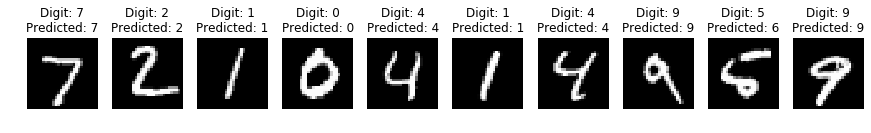

In [13]:
from tensorflow.keras.models import load_model

######################
print("Attempt 1")
model_CNN = load_model("Saved/1CNN_C10r55_MP22_soft20_DO_C10r22_F_dense5_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()


X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

fig = plt.figure(figsize=(15, 15))
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
########################


***Attempt 2***  
As a second attempt, starting from the previous result I only changed the activation of the dense layer, and its number of neurons, increased the filters in a convolutional layer and add a Maxpooling and removed the second to last dense layer, in order to make it more symmetric. The second attempt look is: 

Type of Layer | N filters/neurons | ker / pool size | Activation type
:-------------|:-----------------:|:---------------:|:---------------
Convolutional | 10                |5,5              |relu            
MaxPoolong    |                   |2,2              |            
Dense         | 10                |                 |sigmoid            
Dropout 50%   |                   |                 |
Convolutional | 15                |2,2              |relu       
MaxPoolong    |                   |4,4              |        
Flatten       |                   |                 |            
Dense         | 10 (num_class)    |                 |softmax          

The results of this attempt could look like a disaster, since the accuracy decreased  lot, but onn the testing data it is  able to recognize every digit, while the first one failed for one. So I didn't totally throw away the changes done.

In [14]:
print("Attempt 2")
    
model_CNN = load_model("Saved/2CNN_C10r55_MP22_sigm10_DO_C15r22_MP44_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################


Attempt 2
10000/10000 [==============================] - 3s 323us/sample - loss: 0.6412 - acc: 0.8340
Performance on validation data
Test loss: 0.6411622544288635
Test accuracy: 0.834

12384/60000 [=====>........................] - ETA: 14s - loss: 0.6663 - acc: 0.8236

KeyboardInterrupt: 

***Attempt 3***  
Starting from the last CNN I removed completely the dense layers but for the only one needed that is the very last. Moreover I added two new layers, a  convolutional and a maxpooling one and increased the amount of filters. This attempt is:

Type of Layer | N filters/neurons | ker / pool size | Activation type
:-------------|:-----------------:|:---------------:|:---------------
Convolutional | 10                |5,5              |relu            
MaxPoolong    |                   |2,2              |             
Dropout 50%   |                   |                 |
Convolutional | 25                |2,2              |relu       
MaxPoolong    |                   |2,2              |        
Convolutional | 25                |2,2              |relu    
MaxPoolong    |                   |2,2              |        
Flatten       |                   |                 |            
Dense         | 10 (num_class)    |                 |softmax      

What emerges from this attempt is that this new shape of the CNN seems to be a good one, as the accuracy increases a lot, and the capacity of prediction on data test is good. Still the accuracy is quite a lot under the DNN, so I tried to improve more.

In [ ]:
print("Attempt 3")
    
model_CNN = load_model("Saved/3CNN_C10r55_MP22_DO_C25r22_MP22_C25r22_MP22_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################

***Attempt 4***  
Having reached a quite good result from now on I started doing very little variation in the network not to destroy what I built. For this reason I only added a dense 20-neurons layer with a sigmoid activation to the end of convolution and poolings, before flattening, as it is the most simple way to add parameters.

Type of Layer | N filters/neurons | ker / pool size | Activation type
:-------------|:-----------------:|:---------------:|:---------------
Convolutional | 10                |5,5              |relu            
MaxPoolong    |                   |2,2              |             
Dropout 50%   |                   |                 |
Convolutional | 25                |2,2              |relu       
MaxPoolong    |                   |2,2              |        
Convolutional | 25                |2,2              |relu    
MaxPoolong    |                   |2,2              |       
Dense         | 20                |                 |sigmoid
Flatten       |                   |                 |            
Dense         | 10 (num_class)    |                 |softmax  

What emerges from accuracy is that the network had only worsen a little bit, but no substantial change is observble

In [ ]:
print("Attempt 4")
model_CNN = load_model("Saved/4CNN_C10r55_MP22_DO_C25r22_MP22_C25r22_MP22_sigm20_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################

***Attempt 5***  
Since the previous change almost didn't influenced the results I add some filters to increase once again the number of parameters.

Type of Layer | N filters/neurons | ker / pool size | Activation type
:-------------|:-----------------:|:---------------:|:---------------
Convolutional | 10                |5,5              |relu            
MaxPoolong    |                   |2,2              |             
Dropout 50%   |                   |                 |
Convolutional | 30                |2,2              |relu       
MaxPoolong    |                   |2,2              |        
Convolutional | 25                |2,2              |relu    
MaxPoolong    |                   |2,2              |       
Dense         | 20                |                 |sigmoid
Flatten       |                   |                 |            
Dense         | 10 (num_class)    |                 |softmax  

This attempt gave a slight improvement in prediction accuracy, so I individuated the layer touched here as the one to work on.

In [ ]:
print("Attempt 5")
    
model_CNN = load_model("Saved/5CNN_C10r55_MP22_DO_C30r22_MP22_C25r22_MP22_sigm20_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################

***Attempts 6-9***  
Given the last information I decided to go back on my steps removing definitively the dense layer with sigmoid activation and then incresing repeatedly the number of filters in the second convolutional layer. The shape of the CNN is the following where *n = 30, 40, 60, 100* for respectevely attempts *6, 7, 8, 9*.

Type of Layer | N filters/neurons | ker / pool size | Activation type
:-------------|:-----------------:|:---------------:|:---------------
Convolutional | 10                |5,5              |relu            
MaxPoolong    |                   |2,2              |             
Dropout 50%   |                   |                 |
Convolutional | *n*               |2,2              |relu       
MaxPoolong    |                   |2,2              |        
Convolutional | 25                |2,2              |relu    
MaxPoolong    |                   |2,2              |       
Flatten       |                   |                 |            
Dense         | 10 (num_class)    |                 |softmax  

Following are the evaluations of all these models, it can be seen that accuracy increases until reaches 97% which is comparable to what I obtained with DNNs, confirming that the second convlolutional layer was actually the one to work on.

In [ ]:
print("Attempt 6")
    
model_CNN = load_model("Saved/6CNN_C10r55_MP22_DO_C30r22_MP22_C25r22_MP22_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################


print("Attempt 7")
    
model_CNN = load_model("Saved/7CNN_C10r55_MP22_DO_C40r22_MP22_C25r22_MP22_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################

print("Attempt 8")
    
model_CNN = load_model("Saved/8CNN_C10r55_MP22_DO_C60r22_MP22_C25r22_MP22_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################

print("Attempt 9")
    
model_CNN = load_model("Saved/9CNN_C10r55_MP22_DO_C100r22_MP22_C25r22_MP22_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################


***Attempt 10***  
As last attempt I increased the number *n* of filters once again, but this resulted in a reduce accuracy therefore I estimated that the optimal value for this parameter may be *100* as used in attempt *9*. For sure the network can be improved, but I find that 97% of accuracy is a reasonable value to stop.  
For completeness I show below the evaluation of last model, even though it represents a step back.

In [ ]:
print("Attempt 10")
    
model_CNN = load_model("Saved/10CNN_C10r55_MP22_DO_C200r22_MP22_C25r22_MP22_F_Adagrad.h5")
predictions = model_CNN.predict(X_test)

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

score = model_CNN.evaluate(X_train, Y_train, batch_size=32, verbose=1)

print("Performance on training data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################



##### <span style="color:black"> Exercise 12.3 </span>

The best CNN I've been able to train manages to recognize all the digit I wrote. Even if they are not bad written, the *7* for example takes up a little portion of the entire image and thanks to Maxpooling and Convolution the CNN predicts it rightly, while the DNN can't. This confirms the capacity of CNN to learn even if images are not perfectly centered in the square.

In [4]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

digit_test = np.zeros((10,28, 28))
digit_target = np.zeros((10,10))

for k in range (10):
    
    digit_filename = "./Digits/{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    digit_target[k,k] = 1
    ydim, xdim = digit_in.size
#    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    digit_test[k] = data
    
print("Test data shape = ", digit_test.shape)

Test data shape =  (10, 28, 28)


In [6]:
#load best trained CNN
from tensorflow.keras.models import load_model
model_CNN = load_model("Saved/9CNN_C10r55_MP22_DO_C100r22_MP22_C25r22_MP22_F_Adagrad.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


CNN
10/10 [==============================] - 0s 25ms/sample - loss: 0.2334 - acc: 1.0000
Performance on validation data
Test loss: 0.2334439754486084
Test accuracy: 1.0



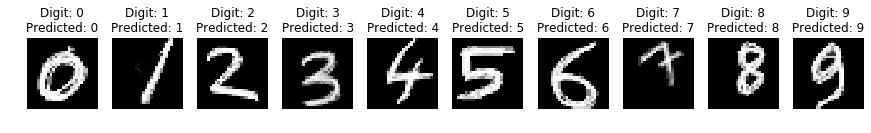

DNN
10/10 [==============================] - 0s 18ms/sample - loss: 2.4483 - acc: 0.6000
Performance on validation data
Test loss: 2.448308229446411
Test accuracy: 0.6



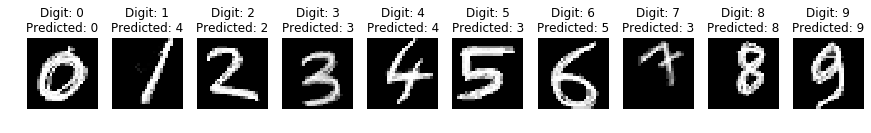

In [7]:
#predict data
if keras.backend.image_data_format() == 'channels_first':
    digit_test = digit_test.reshape(digit_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    digit_test = digit_test.reshape(digit_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

predictions = model_CNN.predict(digit_test)
# evaluate model
print("CNN")

score = model_CNN.evaluate(digit_test, digit_target, verbose=1)


print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)       
    plt.imshow(digit_test[i, :, :, 0], cmap='gray')   
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(digit_target[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
###########################

print("DNN")

digit_test = digit_test.reshape(digit_test.shape[0], img_rows*img_cols)
model_DNN = load_model("Saved/DNN_Adagrad.mod")
predictions = model_DNN.predict(digit_test)

# evaluate model
score = model_DNN.evaluate(digit_test, digit_target, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

if keras.backend.image_data_format() == 'channels_first':
    digit_test = digit_test.reshape(digit_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    digit_test = digit_test.reshape(digit_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)       
    plt.imshow(digit_test[i, :, :, 0], cmap='gray')   
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(digit_target[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()